In [2]:
import xarray as xr
import numpy as np

In [3]:
file_path = "netcdf_files/southern-ocean-chla.nc"

# Open the NetCDF file
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset> Size: 105MB
Dimensions:           (N_PROF: 47276, PRES_ADJUSTED: 81)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              (N_PROF) datetime64[ns] 378kB ...
    LATITUDE          (N_PROF) float64 378kB ...
    LONGITUDE         (N_PROF) float64 378kB ...
Data variables:
    POSITION_QC       (N_PROF) |S1 47kB ...
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB ...
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 4MB ...
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB ...
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 4MB ...
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB ...
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 4MB ...

In [4]:
vals = ds['CHLA_ADJUSTED_QC'].values
vals

array([[b'5', b'5', b'5', ..., b'1', b'1', b'1'],
       [b'5', b'5', b'5', ..., b'1', b'1', b'1'],
       [b'5', b'5', b'5', ..., b'1', b'1', b'1'],
       ...,
       [b'', b'', b'', ..., b'2', b'', b'2'],
       [b'', b'', b'', ..., b'2', b'', b'2'],
       [b'', b'', b'2', ..., b'2', b'', b'2']], dtype='|S1')

In [7]:
import collections
collections.Counter(vals[6])

Counter({b'1': 76, b'5': 5})

In [14]:
lat_min, lat_max = -90, -29
lon_min, lon_max = -1, 101

ds_filtered = ds.where(
    (ds['LATITUDE'] >= lat_min) & (ds['LATITUDE'] <= lat_max) &
    (ds['LONGITUDE'] >= lon_min) & (ds['LONGITUDE'] <= lon_max),
    drop=True
)
ds_filtered

<xarray.Dataset> Size: 66MB
Dimensions:           (N_PROF: 16797, PRES_ADJUSTED: 81)
Coordinates:
  * N_PROF            (N_PROF) int32 67kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              (N_PROF) datetime64[ns] 134kB 2024-06-08T15:24:28.00164...
    LATITUDE          (N_PROF) float64 134kB -30.19 -30.48 ... -64.32 -64.44
    LONGITUDE         (N_PROF) float64 134kB -0.7675 -0.9496 ... 73.39 73.2
Data variables:
    POSITION_QC       (N_PROF) object 134kB b'1' b'1' b'1' ... b'1' b'1' b'1'
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 11MB nan 19.89 ... nan
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 11MB b'1' b'1' ... b'1'
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 11MB nan 35.94 ... nan
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 11MB b'1' b'1' ... b'1'
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 11MB nan 0.2017 ... nan
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 11MB b'5' b'5' ... b'' b'2'

In [9]:
filtered_ds = ds.where(ds['POSITION_QC'] != b'4', drop=True)
filtered_ds

<xarray.Dataset> Size: 186MB
Dimensions:           (N_PROF: 47276, PRES_ADJUSTED: 81)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              (N_PROF) datetime64[ns] 378kB 2024-06-08T15:24:28.00164...
    LATITUDE          (N_PROF) float64 378kB -30.19 -30.48 ... -64.32 -64.44
    LONGITUDE         (N_PROF) float64 378kB -0.7675 -0.9496 ... 73.39 73.2
Data variables:
    POSITION_QC       (N_PROF) object 378kB b'1' b'1' b'1' ... b'1' b'1' b'1'
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB nan 19.89 ... nan
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 31MB b'1' b'1' ... b'1'
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB nan 35.94 ... nan
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 31MB b'1' b'1' ... b'1'
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB nan 0.2017 ... nan
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 31MB b'5' b'5' ... b'' b'2'

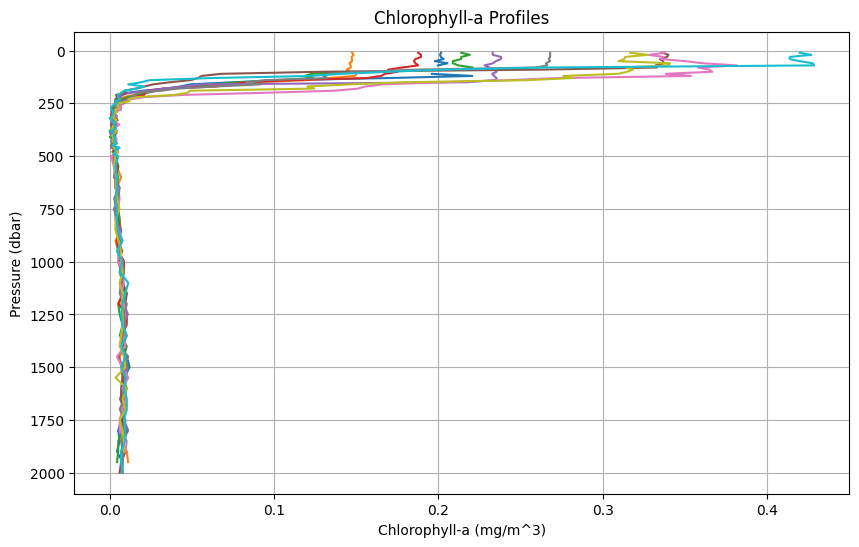

In [10]:
import matplotlib.pyplot as plt

# visualising first 5 profiles of CHLA_ADJUSTED
plt.figure(figsize=(10, 6))

for i in range(10):
    plt.plot(chla[i, :], ds['PRES_ADJUSTED'], label=f"Profile {i+1}")

plt.gca().invert_yaxis()  # Invert the y-axis (pressure increases downward)
plt.xlabel('Chlorophyll-a (mg/m^3)')
plt.ylabel('Pressure (dbar)')
plt.title('Chlorophyll-a Profiles')
plt.grid()
plt.show()